# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [40]:
import os
import keras

from keras import optimizers
from keras import initializers

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [41]:
train, test = keras.datasets.cifar10.load_data()

In [42]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [43]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [44]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    init = keras.initializers.he_normal(seed=None)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, kernel_initializer = init, bias_initializer = "zeros", activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [50]:
## 超參數設定
"""
Set your required experiment parameters
"""
#固定learning rate
#LEARNING_RATE = 1e-4
EPOCHS = 50
BATCH_SIZE = 256
#MOMENTUM = 0.95
#NESTEROV = True


opt_list = ["adagrad", "sgd", "rmsprop", "adam"]

In [51]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for opt in opt_list:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with optimzer",  opt)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    print("Current optimizer = ", opt)
    if opt == "sgd":
        sgd_ = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=sgd_)
    elif opt == "rmsprop":
        rmsprop_ = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=rmsprop_)
    elif opt == "adagrad":
        adagrad_ = optimizers.Adagrad(lr=0.01, epsilon=1e-6, decay=1e-5)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=adagrad_)
    else:
        adam_ = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=adam_)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "optimizer-%s" % str(opt)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with optimzer adagrad
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Current optimizer =  adagrad
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/500

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 20us/step - loss: 1.8632 - acc: 0.3368 - val_loss: 1.7417 - val_acc: 0.3699
Epoch 2/50
50000/50000 [==============================] - 1s 16us/step - loss: 1.6438 - acc: 0.4172 - val_loss: 1.6002 - val_acc: 0.4317
Epoch 3/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.5565 - acc: 0.4465 - val_loss: 1.6276 - val_acc: 0.4173
Epoch 4/50
50000/50000 [==============================] - 1s 16us/step - loss: 1.4903 - acc: 0.4705 - val_loss: 1.5302 - val_acc: 0.4403
Epoch 5/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.4452 - acc: 0.4860 - val_loss: 1.4609 - val_acc: 0.4797
Epoch 6/50
50000/50000 [==============================] - 1s 16us/step - loss: 1.3992 - acc: 0.5049 - val_loss: 1.5734 - val_acc: 0.4403
Epoch 7/50
50000/50000 [==============================] - 1s 16us/step - loss: 1.3623 - acc: 0.5188 - val_loss: 1.4473 - val_acc

50000/50000 [==============================] - 1s 18us/step - loss: 1.8870 - acc: 0.3161 - val_loss: 1.8044 - val_acc: 0.3492
Epoch 3/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.7873 - acc: 0.3598 - val_loss: 1.7307 - val_acc: 0.3885
Epoch 4/50
50000/50000 [==============================] - ETA: 0s - loss: 1.7141 - acc: 0.384 - 1s 18us/step - loss: 1.7095 - acc: 0.3858 - val_loss: 1.6798 - val_acc: 0.4125
Epoch 5/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.6490 - acc: 0.4096 - val_loss: 1.7670 - val_acc: 0.3598
Epoch 6/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.6143 - acc: 0.4236 - val_loss: 1.6885 - val_acc: 0.4102
Epoch 7/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.5672 - acc: 0.4398 - val_loss: 1.7358 - val_acc: 0.3911
Epoch 8/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.5378 - acc: 0.4510 - val_loss: 1.6928 - val_acc: 0.4061
Epoch 9/50
500

50000/50000 [==============================] - 1s 18us/step - loss: 1.6126 - acc: 0.4275 - val_loss: 1.5848 - val_acc: 0.4334
Epoch 4/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.5626 - acc: 0.4448 - val_loss: 1.5656 - val_acc: 0.4366
Epoch 5/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.5092 - acc: 0.4604 - val_loss: 1.4760 - val_acc: 0.4791
Epoch 6/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.4596 - acc: 0.4785 - val_loss: 1.4708 - val_acc: 0.4725
Epoch 7/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.4385 - acc: 0.4874 - val_loss: 1.4674 - val_acc: 0.4755
Epoch 8/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.4015 - acc: 0.5019 - val_loss: 1.4419 - val_acc: 0.4888
Epoch 9/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.3771 - acc: 0.5099 - val_loss: 1.4212 - val_acc: 0.4935
Epoch 10/50
50000/50000 [===========================

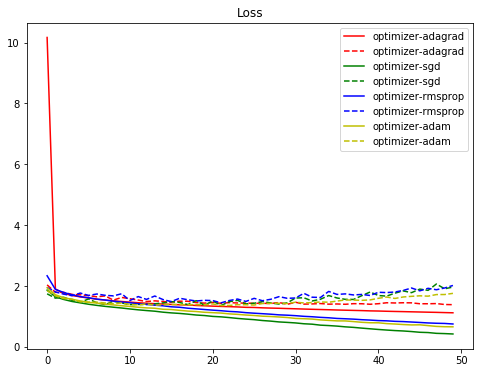

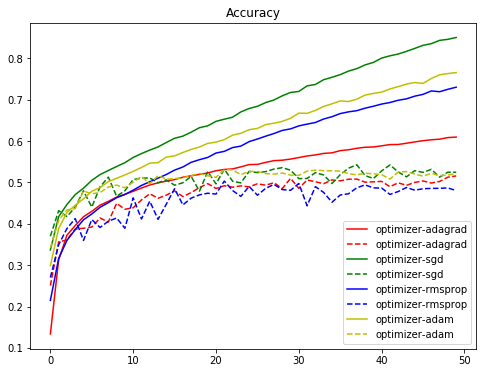

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()